In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn

torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) 
t_u = torch.tensor(t_u).unsqueeze(1) 

t_u.shape

torch.Size([11, 1])

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 8,  4,  0,  1,  7,  5,  9, 10,  6]), tensor([3, 2]))

In [4]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [5]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) # <1> input shape and output shape
linear_model(t_un_val)

tensor([[5.4980],
        [3.9518]], grad_fn=<AddmmBackward0>)

In [6]:
linear_model.weight

Parameter containing:
tensor([[0.6524]], requires_grad=True)

In [7]:
linear_model.bias

Parameter containing:
tensor([0.1549], requires_grad=True)

In [8]:
x = torch.ones(1)
linear_model(x)

tensor([0.8073], grad_fn=<ViewBackward0>)

In [9]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[0.8073],
        [0.8073],
        [0.8073],
        [0.8073],
        [0.8073],
        [0.8073],
        [0.8073],
        [0.8073],
        [0.8073],
        [0.8073]], grad_fn=<AddmmBackward0>)

In [10]:
linear_model = nn.Linear(1, 1) # <1> model
optimizer = optim.SGD(
    linear_model.parameters(), # <2> optimizer
    lr=1e-2)

In [11]:
linear_model.parameters()

<generator object Module.parameters at 0x11ee8d0b0>

In [12]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.9851]], requires_grad=True),
 Parameter containing:
 tensor([0.0680], requires_grad=True)]

In [13]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1> training loss
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val) # <1> vaildation loss
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2> back propagation
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")        

In [14]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1> linear model here
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 110.1042, Validation loss 480.3334
Epoch 1000, Training loss 3.9801, Validation loss 13.9682
Epoch 2000, Training loss 3.0220, Validation loss 6.6897
Epoch 3000, Training loss 2.9749, Validation loss 5.4576

Parameter containing:
tensor([[5.0056]], requires_grad=True)
Parameter containing:
tensor([-15.8303], requires_grad=True)


In [15]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 195.4517, Validation loss 749.0120
Epoch 1000, Training loss 4.0306, Validation loss 14.2458
Epoch 2000, Training loss 3.0245, Validation loss 6.7312
Epoch 3000, Training loss 2.9751, Validation loss 5.4658

Parameter containing:
tensor([[5.0048]], requires_grad=True)
Parameter containing:
tensor([-15.8259], requires_grad=True)


In [16]:
seq_model = nn.Sequential(
            nn.Linear(1, 11), # <1> hidden layer
            nn.Tanh(),
            nn.Linear(11, 1)) # <1> output layer
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=11, bias=True)
  (1): Tanh()
  (2): Linear(in_features=11, out_features=1, bias=True)
)

In [17]:
from collections import OrderedDict

namedseq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 12)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(12 , 1))
]))

namedseq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=12, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=12, out_features=1, bias=True)
)

In [18]:
optimizer = optim.SGD(
    namedseq_model.parameters(), # <2> optimizer for new model
    lr=1e-3) # lr switchs to 0.001

In [19]:
training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = namedseq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', namedseq_model(t_un_val))
print('answer', t_c_val)
print('hidden', namedseq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 133.3389, Validation loss 546.7584
Epoch 1000, Training loss 4.2470, Validation loss 42.5702
Epoch 2000, Training loss 3.0409, Validation loss 22.6853
Epoch 3000, Training loss 2.5594, Validation loss 14.5490
Epoch 4000, Training loss 2.3172, Validation loss 10.0724
Epoch 5000, Training loss 2.1670, Validation loss 7.2857
output tensor([[24.5505],
        [13.3666]], grad_fn=<AddmmBackward0>)
answer tensor([[28.],
        [15.]])
hidden tensor([[-0.0098],
        [-0.0081],
        [ 0.0065],
        [ 0.0048],
        [ 0.0927],
        [-0.0031],
        [-0.0160],
        [ 0.0074],
        [ 0.0009],
        [-0.0161],
        [-0.0064],
        [ 0.0121]])


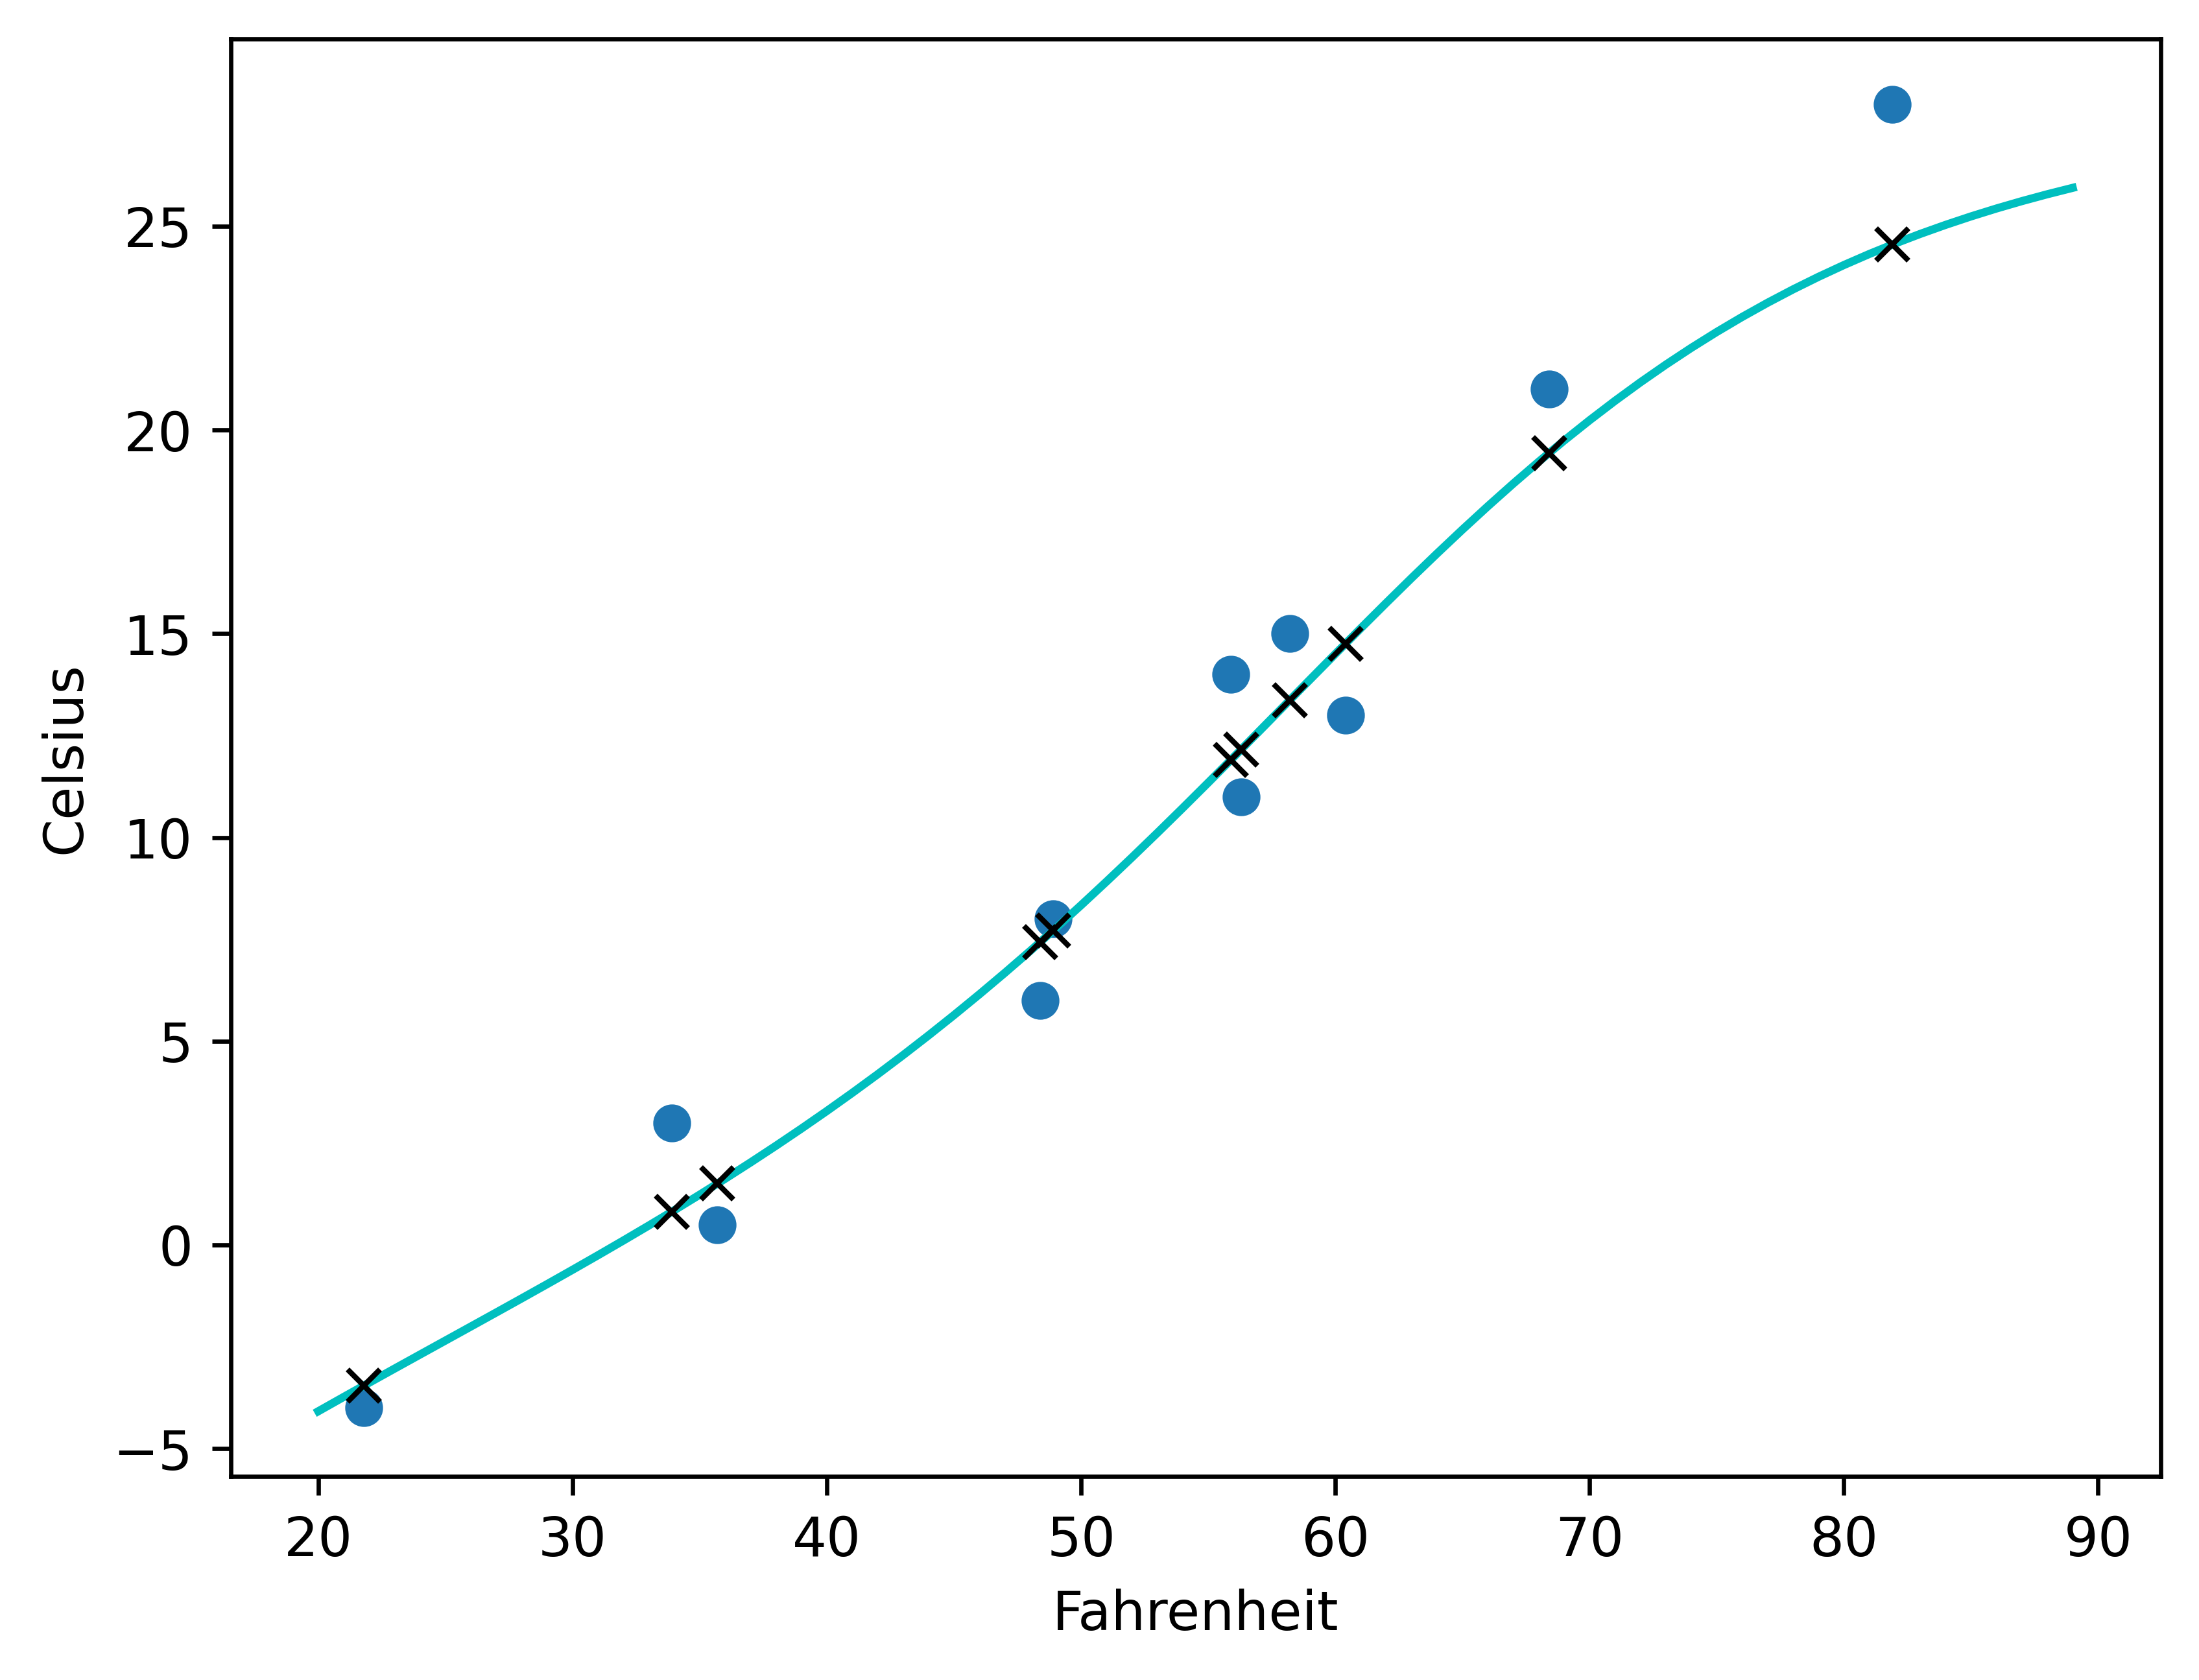

In [20]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), namedseq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), namedseq_model(0.1 * t_u).detach().numpy(), 'kx')

### Exercise 6.1

In [21]:
neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count , 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=20, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=20, out_features=1, bias=True)
)

In [24]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 10000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

Epoch 1, Training loss 2.0499, Validation loss 4.2892
Epoch 1000, Training loss 1.9981, Validation loss 3.3456
Epoch 2000, Training loss 1.9622, Validation loss 2.7461
Epoch 3000, Training loss 1.9361, Validation loss 2.3661
Epoch 4000, Training loss 1.9161, Validation loss 2.1285
Epoch 5000, Training loss 1.9004, Validation loss 1.9848
Epoch 6000, Training loss 1.8875, Validation loss 1.9041
Epoch 7000, Training loss 1.8767, Validation loss 1.8663
Epoch 8000, Training loss 1.8677, Validation loss 1.8586
Epoch 9000, Training loss 1.8601, Validation loss 1.8731
Epoch 10000, Training loss 1.8539, Validation loss 1.9046


### Exercise 6.2

In [25]:
import csv
wine_path = 'dlwpt-code-master/data/p1ch4/tabular-wine/winequality-white.csv'

wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";",
                         skiprows=1)

wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [26]:
wineq_numpy.shape

(4898, 12)

In [27]:
wineq = torch.from_numpy(wineq_numpy)

In [28]:
data = wineq[:,:-1]
data,data.shape

(tensor([[ 7.0000,  0.2700,  ...,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  ...,  0.4900,  9.5000],
         ...,
         [ 5.5000,  0.2900,  ...,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  ...,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [30]:
target = wineq[:,-1].unsqueeze(1)
target, target.shape

(tensor([[6.],
         [6.],
         ...,
         [7.],
         [6.]]),
 torch.Size([4898, 1]))

In [32]:
n_samples = data.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices.shape, val_indices.shape

(torch.Size([3919]), torch.Size([979]))

In [33]:
data_train = data[train_indices]
target_train = target[train_indices]

data_val = data[val_indices]
target_val = target[val_indices]

In [34]:
# define model

input_shape = data.shape[1] # numbers of feature we want to add in our model
n_neurons = 24 # number of neurons we picked

seq_model = nn.Sequential(
            nn.Linear(input_shape, n_neurons), #  hidden layer
            nn.Tanh(), # activation function
            nn.Linear(n_neurons, 1)) #  output layer
seq_model

Sequential(
  (0): Linear(in_features=11, out_features=24, bias=True)
  (1): Tanh()
  (2): Linear(in_features=24, out_features=1, bias=True)
)

In [ ]:
# define loss
nn.MSELoss()

In [35]:
# define optimizer
optimizer = optim.Adam(seq_model.parameters(), lr = 1e-3)

In [36]:
# training loop
def training_loop(n_epochs, optimizer, model, loss_fn, data_train, data_val,
                  target_train, target_val):
    for epoch in range(1, n_epochs + 1):
        pred_train = model(data_train) # training loss
        loss_train = loss_fn(pred_train, target_train)
        
        pred_val = model(data_val) # vaildation loss
        loss_val = loss_fn(pred_val, target_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2> back propagation
        optimizer.step()
        
        if epoch == 1 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")        


In [38]:
#train
training_loop(
    n_epochs = 4000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    data_train = data_train,
    data_val = data_val, 
    target_train= target_train,
    target_val = target_val)

Epoch 1, Training loss 0.5431, Validation loss 0.5553
Epoch 500, Training loss 0.5245, Validation loss 0.5435
Epoch 1000, Training loss 0.5175, Validation loss 0.5439
Epoch 1500, Training loss 0.5130, Validation loss 0.5435
Epoch 2000, Training loss 0.5094, Validation loss 0.5436
Epoch 2500, Training loss 0.5054, Validation loss 0.5439
Epoch 3000, Training loss 0.5025, Validation loss 0.5448
Epoch 3500, Training loss 0.5006, Validation loss 0.5461
Epoch 4000, Training loss 0.4986, Validation loss 0.5463
